# Proyek Analisis Data: Bike-Sharing-dataset
- **Nama:** Alfarelzi
- **Email:** alfarezi31as@gmail.com
- **ID Dicoding:** Farelzi

## Menentukan Pertanyaan Bisnis


- Bagaimana kondisi cuaca seperti suhu, kelembapan, dan kecepatan angin mempengaruhi jumlah peminjaman sepeda harian?

- Kapan puncak peminjaman sepeda terjadi?
Bagaimana pola peminjaman sepeda berubah berdasarkan jam, hari, atau bulan?

- Apakah ada perbedaan yang signifikan dalam pola peminjaman antara pengguna terdaftar dan pengguna kasual?
Bagaimana karakteristik peminjaman mereka berbeda?

## Tentang Data

### Dataset ini berisi informasi tentang:

- **instant**: indeks baris
- **dteday**: tanggal
- **season**: musim (1: semi, 2: panas, 3: gugur, 4: dingin)
- **yr**: tahun (0: 2011, 1:2012)
- **mnth**: bulan (1 sampai 12)
- **hr**: jam (0 sampai 23)
- **holiday**: apakah hari itu libur atau tidak
- **weekday**: hari
- **workingday**: 1 jika bukan akhir pekan atau hari libur, 0 jika sebaliknya
- **weathersit**: kondisi cuaca
- **temp**: temperatur ternormalisasi (Celcius)
- **atemp**: suhu yang dirasakan, ternormalisasi (Celcius)
- **hum**: kelembapan ternormalisasi
- **windspeed**: kecepatan angin ternormalisasi
- **casual**: jumlah pengguna tidak terdaftar
- **registered**: jumlah pengguna terdaftar
- **cnt**: jumlah total sepeda yang disewa (termasuk terdaftar dan tidak)

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
df_day=pd.read_csv("Bike-Sharing-dataset/day.csv") # Memanggil day.csv dengan variabel df_day

df_hour=pd.read_csv("Bike-Sharing-dataset/hour.csv") # Memanggil day.csv dengan variabel df_day


In [3]:
df_day.head() #Menampilkan 5 baris teratas data day.csv

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_hour.head() #Menampilkan 5 baris teratas data hour.csv

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
def check_data(df):
    print("Info:")
    print(df.info())
    print("\nJumlah nilai yang hilang di setiap kolom:")
    print(df.isna().sum())
    print("\nJumlah data duplikat:")
    print(df.duplicated().sum())
    print("\nBentuk data:")
    print(df.shape)
    print("\nTipe data setiap kolom:")
    print(df.dtypes)

check_data(df_day) #Check data day.csv


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Jumlah nilai yang hilang di setiap kolom:
instant       0
dteday        0
season 

In [6]:
check_data(df_hour) #Check data hour.csv

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Jumlah nilai yang hilang di setiap ko

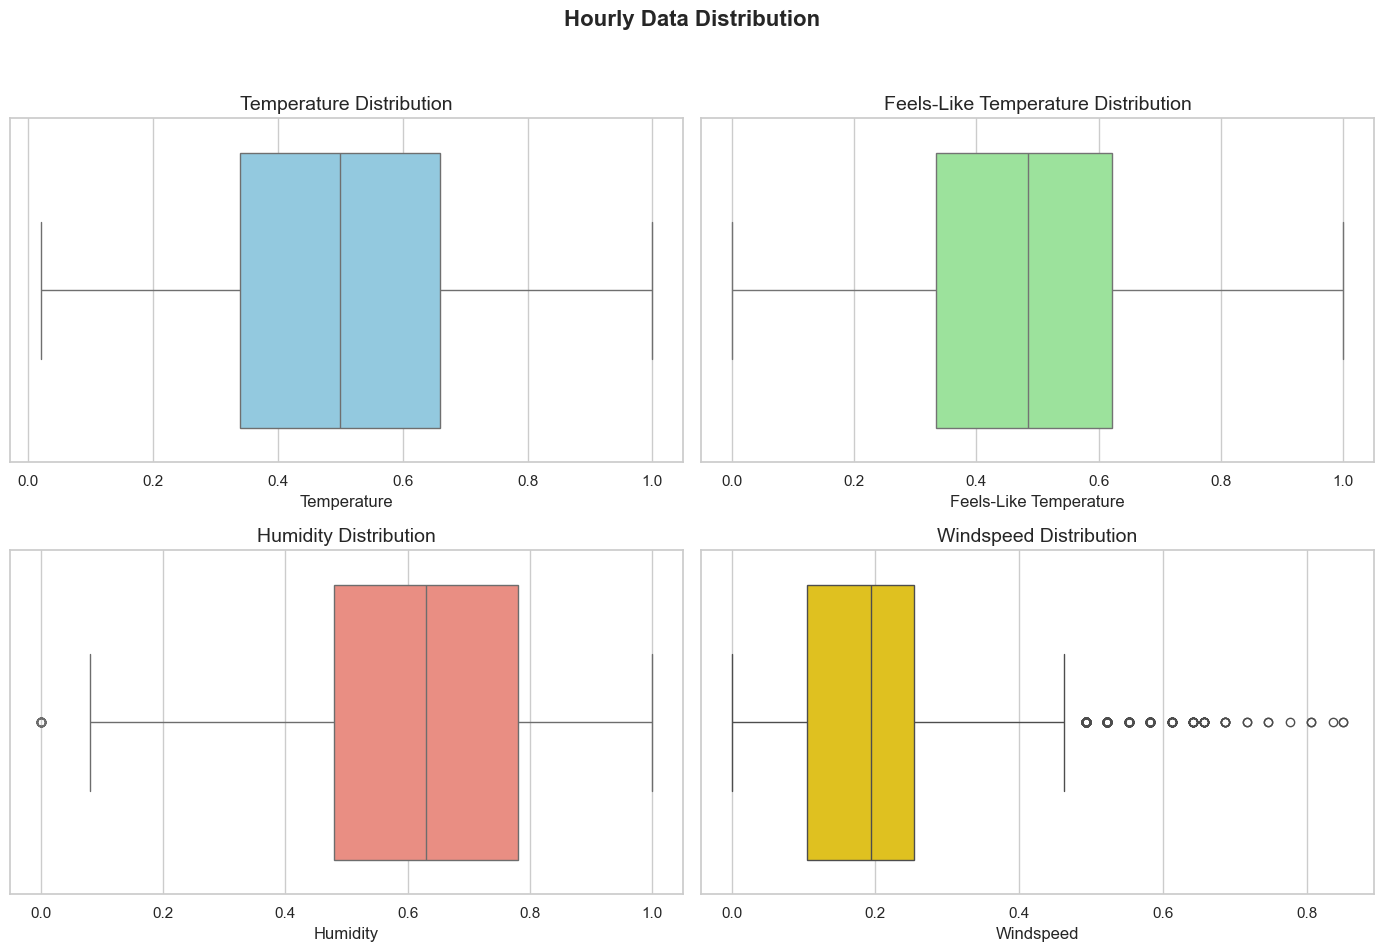

In [7]:
# Membuat boxplot yang lebih menarik untuk dataset hourly

# Menentukan tema visualisasi
sns.set(style="whitegrid")

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Hourly Data Distribution', fontsize=16, fontweight='bold')

# Temperature Distribution
sns.boxplot(ax=axes[0, 0], x=df_hour['temp'], color='skyblue')
axes[0, 0].set_title('Temperature Distribution', fontsize=14)
axes[0, 0].set_xlabel('Temperature', fontsize=12)

# Feels-Like Temperature Distribution
sns.boxplot(ax=axes[0, 1], x=df_hour['atemp'], color='lightgreen')
axes[0, 1].set_title('Feels-Like Temperature Distribution', fontsize=14)
axes[0, 1].set_xlabel('Feels-Like Temperature', fontsize=12)

# Humidity Distribution
sns.boxplot(ax=axes[1, 0], x=df_hour['hum'], color='salmon')
axes[1, 0].set_title('Humidity Distribution', fontsize=14)
axes[1, 0].set_xlabel('Humidity', fontsize=12)

# Windspeed Distribution
sns.boxplot(ax=axes[1, 1], x=df_hour['windspeed'], color='gold')
axes[1, 1].set_title('Windspeed Distribution', fontsize=14)
axes[1, 1].set_xlabel('Windspeed', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




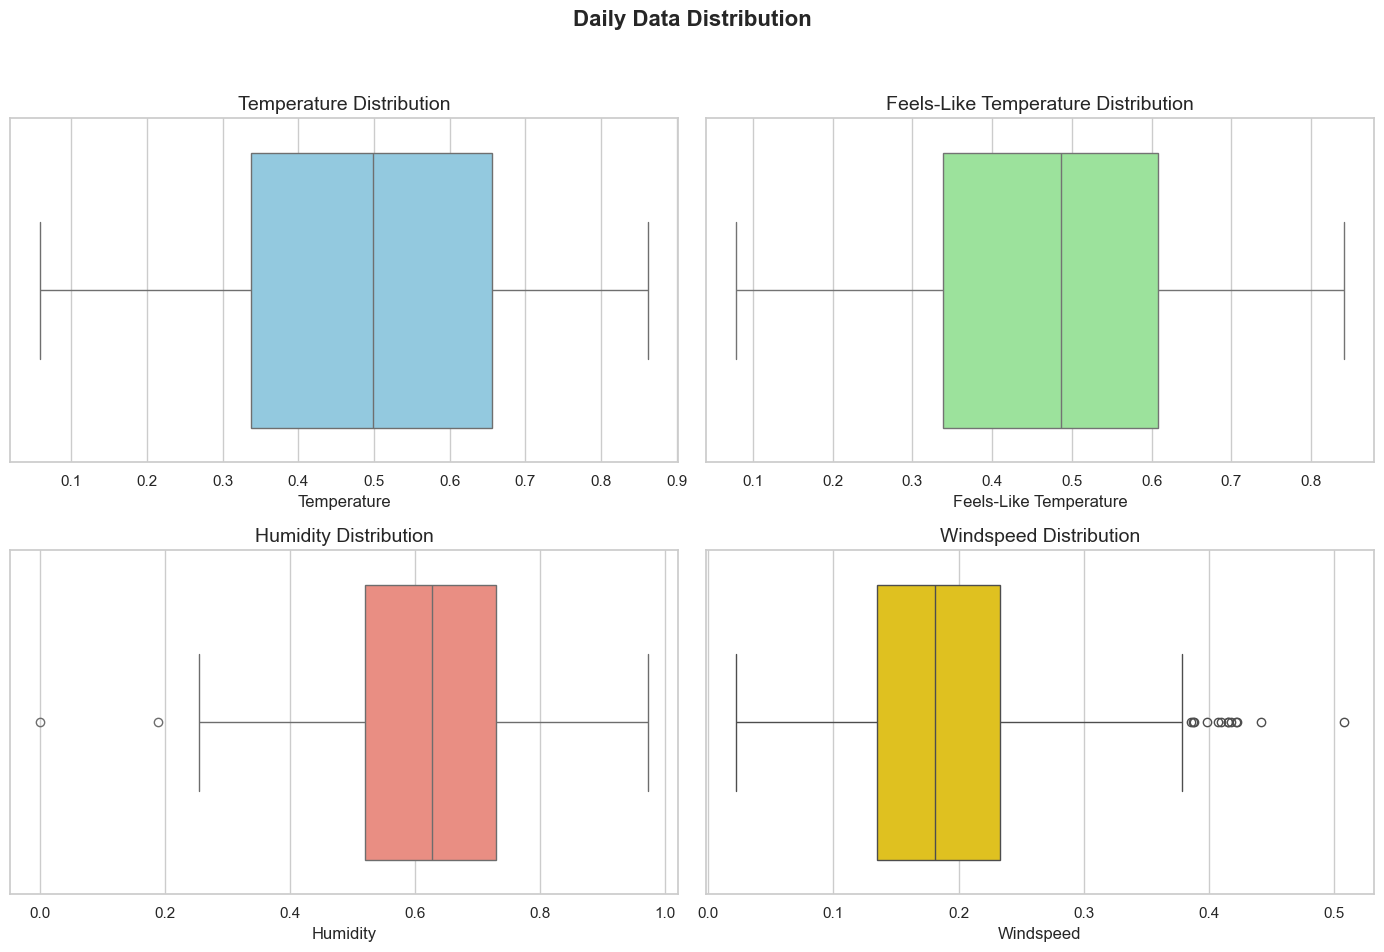

In [8]:
# Membuat ulang visualisasi untuk dataset daily dengan penyesuaian yang sama

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Daily Data Distribution', fontsize=16, fontweight='bold')

# Temperature Distribution
sns.boxplot(ax=axes[0, 0], x=df_day['temp'], color='skyblue')
axes[0, 0].set_title('Temperature Distribution', fontsize=14)
axes[0, 0].set_xlabel('Temperature', fontsize=12)

# Feels-Like Temperature Distribution
sns.boxplot(ax=axes[0, 1], x=df_day['atemp'], color='lightgreen')
axes[0, 1].set_title('Feels-Like Temperature Distribution', fontsize=14)
axes[0, 1].set_xlabel('Feels-Like Temperature', fontsize=12)

# Humidity Distribution
sns.boxplot(ax=axes[1, 0], x=df_day['hum'], color='salmon')
axes[1, 0].set_title('Humidity Distribution', fontsize=14)
axes[1, 0].set_xlabel('Humidity', fontsize=12)

# Windspeed Distribution
sns.boxplot(ax=axes[1, 1], x=df_day['windspeed'], color='gold')
axes[1, 1].set_title('Windspeed Distribution', fontsize=14)
axes[1, 1].set_xlabel('Windspeed', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Cleaning Data

In [9]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [10]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [11]:
df_day
df_hour


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

### Explore ...

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2